# HOMEWORK 2

## Risk Management of Bonds

-- Canel Biryol and Shashank Gupta

### Environment setup

All the analysis in this has been done using the Python libraries 'Pandas' and 'SciPy'

First, we setup the Python dependencies:

In [1]:
# import numpy as np
# import pandas as pd
# import scipy
# import matplotlib.pyplot as plt
# import seaborn as sns
# import math
# import datetime
# import matplotlib.pyplot as plt

# sns.set(color_codes=True)
# epsilon = 1e-4
# %matplotlib inline

In [2]:
# df = pd.read_csv('data/FRB_H15_reduced.csv')
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.set_index('Date')
# # Get rid of rows with 'ND' as value
# df = df[df['1-month'] != 'ND']
# df = df.astype(float)
# # To see how the data looks like
# df.head()

NameError: name 'pd' is not defined

In [ ]:
# corr_matrix = df.corr()
# # To show how the correlation matrix looks like
# corr_matrix

In [ ]:
# eig_values, eig_vectors = np.linalg.eigh(corr_matrix)
# # Make a list of (eigenvalue, eigenvector) tuples, and sort them by 
# eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
# eig_pairs.sort(key=lambda x: x[0], reverse=True)
# # Show the first eigenvectors:
# eig_pairs

In [ ]:
# # Gamma is given by N/T, where N is the number of iid random variables
# gamma = float(df.shape[1])/float(df.shape[0])
# mp_value_pos = (1 + math.sqrt(gamma))**2
# mp_value_neg = (1 - math.sqrt(gamma))**2
# print mp_value_pos, mp_value_neg
# print df.shape

In [ ]:
# sig_eig_pairs = [(val, vec) for val, vec in eig_pairs if val > mp_value_pos]
# sig_eig_pairs

In [ ]:
# df_std = df/df.std()

# sig_eig_vecs = np.array([ vec for val, vec in sig_eig_pairs])
# sig_eig_vecs_proj_matrix = np.dot(sig_eig_vecs.T, sig_eig_vecs)

# projection = pd.DataFrame(np.dot(df_std, sig_eig_vecs_proj_matrix))
# residual = pd.DataFrame(np.array(df_std) - projection)
# residual_corr = residual.corr()
# print residual.head()

In [ ]:
# res_eig_vals, res_eig_vecs = np.linalg.eigh(residual_corr)
# eig_pairs = [(np.abs(res_eig_vals[i]), res_eig_vecs[:,i]) for i in range(len(res_eig_vals))]
# eig_pairs.sort(key=lambda x: x[0], reverse=True)

# sig_eig_pairs = [(val, vec) for val, vec in eig_pairs if val > mp_value_pos]

# sig_eig_vecs = np.array([ vec for val, vec in sig_eig_pairs])
# sig_eig_vecs_proj_matrix = np.dot(sig_eig_vecs.T, sig_eig_vecs)

# projection = pd.DataFrame(np.dot(residual, sig_eig_vecs_proj_matrix))
# residual = pd.DataFrame(np.array(residual) - projection)
# residual = residual/residual.std()
# residual_corr = residual.corr()

# res_eig_vals, res_eig_vecs = np.linalg.eigh(residual_corr)
# res_eig_vals

In [ ]:
# # Remove eigenvalues which are less then epsilon (our precision tolerance), since those generally exist because of 
# # degeneracy and floating-point precision errors
# #res_eig_vals = np.array([val for val in res_eig_vals if (val > epsilon)])
# def eigden(lam, T, N):
#     # Method for plotting Marchenko Pastur distribution
#     # Taken from: https://anaconda.org/steve98654/ana_con_server_demo/notebook
#     gamma = float(N)/float(T)
#     lambda_plus = (1 + np.sqrt(gamma))**2
#     lambda_minus = (1 - np.sqrt(gamma))**2
#     return 1/(2 * np.pi * float(lam) * gamma) * np.sqrt((lambda_plus - lam) * (lam - lambda_minus))


# plt.figure(figsize=(16,10))
# plt.hist(res_eig_vals, bins=75, normed=True)

# lamvls = np.linspace(0.0001,5,1000) 
# plt.plot(lamvls,[eigden(lam, df.shape[0], df.shape[1]) for lam in lamvls])

# plt.title('Fig (1): Histogram of eigenvalues of residual matrix for first quarter')
# plt.show()

In [ ]:
weights = np.array([0, -100, -50, 0, 50, 0, -20, 0, 50, 0, 0])
weights = weights/np.abs(weights).sum()
variance = np.dot(np.dot(df.cov(), weights), weights.T)
math.sqrt(variance)


In [ ]:
portfolio = df.dot(weights)
portfolio.head()

In [ ]:
from scipy.stats import norm, t

# N(x; mu, sig) best fit (finding: mu, stdev)
mu_norm, sig_norm = norm.fit(portfolio)
dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)
pdf = norm.pdf(x, mu_norm, sig_norm)
print("Integral norm.pdf(x; mu_norm, sig_norm) dx = %.2f" % (np.sum(pdf*dx)))
print("Sample mean  = %.5f" % mu_norm)
print("Sample stdev = %.5f" % sig_norm)
 
# Student t best fit (finding: nu)
parm = t.fit(portfolio)
nu, mu_t, sig_t = parm
pdf2 = t.pdf(x, nu, mu_t, sig_t)
print("Integral t.pdf(x; mu, sig) dx = %.2f" % (np.sum(pdf2*dx)))
print("nu = %.2f" % nu)


In [ ]:
plt.figure(figsize=(16,10))
plt.hist(portfolio, bins=1000, normed=True)
plt.show()

In [ ]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
df_change = df.pct_change()[1:]
df_change = df_change.replace([np.inf, -np.inf], np.nan)
df_change = df_change.fillna(value=0)*100
plt.figure(figsize=(16,10))

#bins = xrange(int(df['3-month'].min())-1, int(df_change['3-month'].max())+1)
plt.hist(df['3-month'], bins=500, alpha=0.75, label='3 Months', normed=True)
plt.hist(df['6-month'], bins=500, alpha=0.75, label='6 Months', normed=True)
plt.hist(df['2-year'], bins=500, alpha=0.75, label='2 Years', normed=True)
plt.hist(df['5-year'], bins=500, alpha=0.75, label='5 Years', normed=True)
plt.hist(df['10-year'], bins=500, alpha=0.75, label='10 Years', normed=True)
# fig, ax = plt.subplots(1, figsize=(16,10))
# df_change['3-month'].plot(ax=ax, alpha=0.75, label='3 Months')
# df_change['6-month'].plot(ax=ax, alpha=0.75, label='6 Months')
# df_change['2-year'].plot(ax=ax, alpha=0.75, label='2 years')
# df_change['5-year'].plot(ax=ax, alpha=0.75, label='5 years')
# df_change['10-year'].plot(ax=ax, alpha=0.75, label='10 years')
plt.legend(loc='best')
plt.show()

In [ ]:
corr_matrix_example = pd.read_csv('data/CorrelationMatrix.csv', index_col=0)
corr_matrix_example = corr_matrix_example.astype(float)
corr_matrix_example

In [ ]:
eig_values_example, eig_vectors_example = np.linalg.eigh(corr_matrix_example)
# Make a list of (eigenvalue, eigenvector) tuples, and sort them by 
eig_pairs_example = [(np.abs(eig_values_example[i]), eig_vectors_example[:,i]) for i in range(len(eig_values_example))]
eig_pairs_example.sort(key=lambda x: x[0], reverse=True)
# Show the first three eigenvectors:
eig_pairs_example

In [3]:
eig_pairs

NameError: name 'eig_pairs' is not defined

## Question 1 

For each tenor bucket, a 'haircut' $h_i$ is given.
Let us assume this 'haircut' is proportional to the 99% VaR of bond returns

\begin{align}
h_i \propto \sigma_i
\newline
\implies h_i = k\sigma_i
\newline
\implies \sigma_i = \frac{h_i}{k}
\end{align}
where $k$ is a constant

Let $N_i$ be the net value held in bucket $i$. Then, the net value $N$ is given as:
\begin{align}
N = \sum_{i=1}^{10} N_i
\end{align}

This gives us the weight of each bucket as following:
\begin{align}
w_i = \frac{N_i}{N}
\end{align}

Now, assuming bond returns follow normal distribution, let $\sigma$ be the standard deviation of the portfolio. Then:
\begin{align}
\sigma = \sqrt{\textbf{$w^\intercal$ $\Sigma$ $w$}}
\end{align}
where $\textbf{$w$}$ $\Rightarrow$ weights vector and $\Sigma$ $\Rightarrow$ Covariance Matrix


\begin{align}
\implies \sigma= \sqrt{\begin{bmatrix}w_1 & w_2 & \ldots & w_{10} \end{bmatrix}
                        \begin{bmatrix} 
                            \sigma_{1}^{2} & \sigma_{1}\sigma_{2}\rho_{12} & \dots & \sigma_{1}\sigma_{10}\rho_{110}\\
                            \sigma_{1}\sigma_{2}\rho_{12} & \sigma_{2}^2 & \dots \\
                            \vdots  &  & \ddots & \vdots \\
                            \sigma_{1}\sigma_{10}\rho_{110} &     &   & \sigma_{10}^{2} 
                            \end{bmatrix}
                        \begin{bmatrix}w_1 \\ w_2 \\ \ldots \\ w_{10} \end{bmatrix}}
\end{align}

\begin{align}
= \sqrt{\sum_{i=1}^{10} \sum_{j=1}^{10} \sigma_i \sigma_j \rho_{ij} w_i w_j} \\
= \sqrt{\sum_{i=1}^{10} \sum_{j=1}^{10} \frac{h_i}{k}\frac{h_j}{k}\rho_{ij}\frac{N_i}{N}\frac{N_j}{N}} \\
\implies \sigma = \frac{1}{kN} \sqrt{\sum_{i=1}^{10}\sum_{j=1}^{10}\rho_{ij}h_i h_j N_i N_j}
\end{align}
  
Now, since we assumed the bond returns to be distributed normally, a linear combination of them will also be normally distributed.
  
Hence, for the portfolio the haircut '$h$' will be given by:
\begin{align}
h \propto \sigma
\newline
\implies h = k\sigma \\
\end{align}
\begin{align}
\implies h = k  \frac{1}{kN} \sqrt{\sum_{i=1}^{10}\sum_{j=1}^{10}\rho_{ij}h_i h_j N_i N_j} \\
\implies h = \frac{1}{N} \sqrt{\sum_{i=1}^{10}\sum_{j=1}^{10}\rho_{ij}h_i h_j N_i N_j}
\end{align}

Thus, the risk premium $\textbf{R}$ is given by:
\begin{align}
\boxed{\textbf{R} = h N
= \sqrt{\sum_{i=1}^{10}\sum_{j=1}^{10}\rho_{ij}h_i h_j N_i N_j}}
\end{align}



***
## Question 2

Using the link provided https://www.federalreserve.gov/datadownload/Choose.aspx?rel=H15 we downloaded the Constant Maturity Treasury (CMT) bond rates for the following tenors : 1-Month, 3-Month, 6-Month, 1-Year, 3-Year, 5-Year, 7-Year, 10-Year, 20-Year, and 30-Year. We only took a subsection of the data provided; from 2007-03-23 to 2017-03-23 (10 years data)

To reduced the table headers to make it easier to read by Pandas. The relevant file 'FRB_H15_reduced.csv' can be seen in the 'data' directory

All the analysis in this has been done using the Python libraries 'Pandas' and 'NumPy'  

First, we setup the Python dependencies:

In [4]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

Next, we load the timeseries data into a Pandas dataframe:

In [5]:
df = pd.read_csv('data/FRB_H15_reduced.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
# Get rid of rows with 'ND' as value
df = df[df['1-month'] != 'ND']
df = df.astype(float)
# To see how the data looks like
df.head()

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
Date,,,,,,,,,,,
2007-03-23,5.24,5.08,5.10,4.93,4.60,4.54,4.52,4.54,4.62,4.88,4.80
2007-03-26,5.22,5.06,5.09,4.91,4.56,4.50,4.48,4.51,4.60,4.86,4.79
2007-03-27,5.20,5.08,5.09,4.91,4.58,4.51,4.50,4.53,4.62,4.89,4.81
2007-03-28,5.18,5.06,5.08,4.90,4.53,4.49,4.50,4.53,4.62,4.90,4.83
2007-03-29,5.05,5.05,5.06,4.90,4.58,4.52,4.53,4.55,4.64,4.90,4.83


Let's see how the rates change over time:

In [15]:
df_change = df.pct_change()[1:]
# Remove inf and NaN values in the dataframe
df_change = df_change.replace([np.inf, -np.inf], np.nan)
df_change = df_change.dropna(axis=0,how='any')
# To see how the returns looks like
df_change.head()

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
Date,,,,,,,,,,,
2007-03-26,-0.003817,-0.003937,-0.001961,-0.004057,-0.008696,-0.008811,-0.008850,-0.006608,-0.004329,-0.004098,-0.002083
2007-03-27,-0.003831,0.003953,0.000000,0.000000,0.004386,0.002222,0.004464,0.004435,0.004348,0.006173,0.004175
2007-03-28,-0.003846,-0.003937,-0.001965,-0.002037,-0.010917,-0.004435,0.000000,0.000000,0.000000,0.002045,0.004158
2007-03-29,-0.025097,-0.001976,-0.003937,0.000000,0.011038,0.006682,0.006667,0.004415,0.004329,0.000000,0.000000
2007-03-30,0.003960,-0.001980,0.000000,0.000000,0.000000,0.004425,0.002208,0.006593,0.002155,0.004082,0.002070


In [18]:
print df.shape
print df_change.shape

(2504, 11)
(2410, 11)


### Historical Volatilities of interest rates ###

Historical volatilities are the standard deviations for each interest rate:

In [6]:
volatilities = df.std()
volatilities

1-month    1.181415
3-month    1.196069
6-month    1.225081
1-year     1.188313
2-year     1.089356
3-year     1.038817
5-year     0.972643
7-year     0.916562
10-year    0.881610
20-year    0.902208
30-year    0.774207
dtype: float64

### Historical volatilities of interest rate returns###

Historical volatilities are the standard deviations for returns of each interest rate:

In [21]:
vol_returns = df_change.std()
vol_returns

1-month    0.461274
3-month    0.351918
6-month    0.100285
1-year     0.057110
2-year     0.053362
3-year     0.045894
5-year     0.035948
7-year     0.029280
10-year    0.023022
20-year    0.018105
30-year    0.016603
dtype: float64

### Correlation matrix of interest rate ###

In [7]:
corr_matrix = df.corr()
# To show how the correlation matrix looks like
corr_matrix

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
1-month,1.000000,0.996157,0.988650,0.980268,0.957150,0.922289,0.841645,0.762961,0.696912,0.574766,0.546457
3-month,0.996157,1.000000,0.996193,0.989637,0.968581,0.934291,0.853933,0.774537,0.707737,0.584191,0.553151
6-month,0.988650,0.996193,1.000000,0.997418,0.979444,0.946374,0.866561,0.785603,0.717580,0.592526,0.555005
1-year,0.980268,0.989637,0.997418,1.000000,0.988929,0.960377,0.883735,0.803226,0.732418,0.605738,0.563677
2-year,0.957150,0.968581,0.979444,0.988929,1.000000,0.989651,0.933236,0.862196,0.787439,0.658582,0.613263
3-year,0.922289,0.934291,0.946374,0.960377,0.989651,1.000000,0.971372,0.916118,0.843886,0.718547,0.671766
5-year,0.841645,0.853933,0.866561,0.883735,0.933236,0.971372,1.000000,0.983375,0.936492,0.836475,0.797046
7-year,0.762961,0.774537,0.785603,0.803226,0.862196,0.916118,0.983375,1.000000,0.980128,0.910874,0.881436
10-year,0.696912,0.707737,0.717580,0.732418,0.787439,0.843886,0.936492,0.980128,1.000000,0.972240,0.952036
20-year,0.574766,0.584191,0.592526,0.605738,0.658582,0.718547,0.836475,0.910874,0.972240,1.000000,0.987019


### Correlation matrix of interest rate returns ###

In [20]:
corr_matrix_returns = df_change.corr()
# To show how the correlation matrix looks like
corr_matrix_returns

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
1-month,1.000000,0.279559,0.156380,0.173430,0.064029,0.064352,0.048096,0.040466,0.043077,0.049016,0.047357
3-month,0.279559,1.000000,0.332921,0.199837,0.111603,0.097945,0.084455,0.070922,0.066900,0.055787,0.055254
6-month,0.156380,0.332921,1.000000,0.329809,0.227646,0.196749,0.183232,0.163512,0.161944,0.148297,0.147718
1-year,0.173430,0.199837,0.329809,1.000000,0.504137,0.480754,0.435947,0.404599,0.378125,0.334286,0.323005
2-year,0.064029,0.111603,0.227646,0.504137,1.000000,0.845946,0.796243,0.736552,0.680432,0.594327,0.558889
3-year,0.064352,0.097945,0.196749,0.480754,0.845946,1.000000,0.923004,0.871416,0.815739,0.724822,0.684714
5-year,0.048096,0.084455,0.183232,0.435947,0.796243,0.923004,1.000000,0.968248,0.927013,0.848760,0.810990
7-year,0.040466,0.070922,0.163512,0.404599,0.736552,0.871416,0.968248,1.000000,0.967684,0.908334,0.876774
10-year,0.043077,0.066900,0.161944,0.378125,0.680432,0.815739,0.927013,0.967684,1.000000,0.958993,0.936166
20-year,0.049016,0.055787,0.148297,0.334286,0.594327,0.724822,0.848760,0.908334,0.958993,1.000000,0.980326


### Distribution of interest rates ###

To see what kind of distribution the interest rates follow, we decided to plot a histogram for tenors 3-Months, 6-Months, 2-Years, 5-years, and 10-Years, using the data we had:

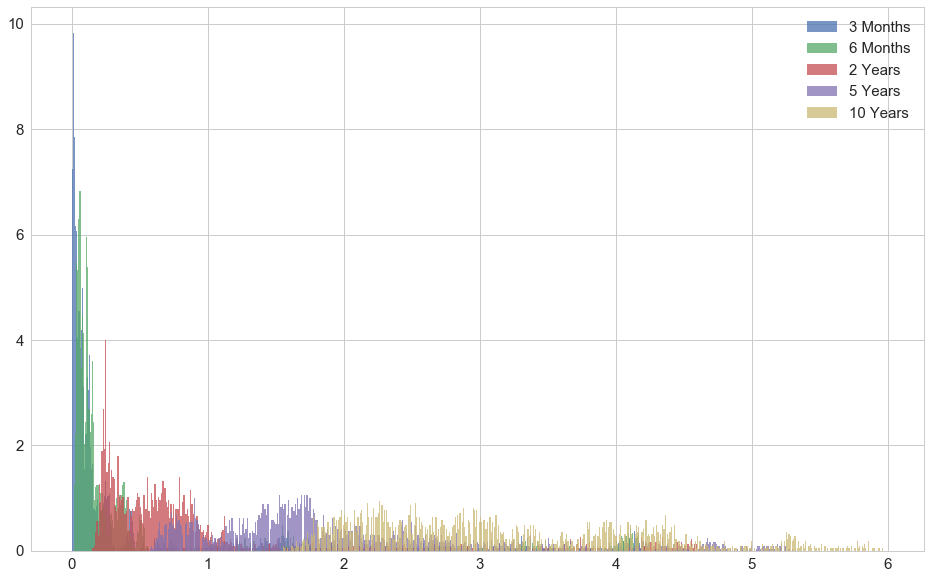

In [34]:
tenor_label_pairs = [('3-month','3 Months'), ('6-month','6 Months'), ('2-year','2 Years'), \
                     ('5-year','5 Years'), ('10-year', '10 Years')]

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.figure(figsize=(16,10))

for (tenor, label) in tenor_label_pairs:
    plt.hist(df[tenor]/df[tenor].std(), bins=500, alpha=0.75, label=label, normed=True)

plt.legend(loc='best')
plt.show()

The histogram of the various interest rates look similar to what you would expect from a log-normal distribution:

![Probability Density Function of a Log-normal Distribution](data/PDF-log_normal_distributions.png)

### Distribution of interest rates returns ###

To see what kind of distribution the returns of the interest rates follow, we decided to plot a histogram for tenors 3-Months, 6-Months, 2-Years, 5-years, and 10-Years, using the data we had:

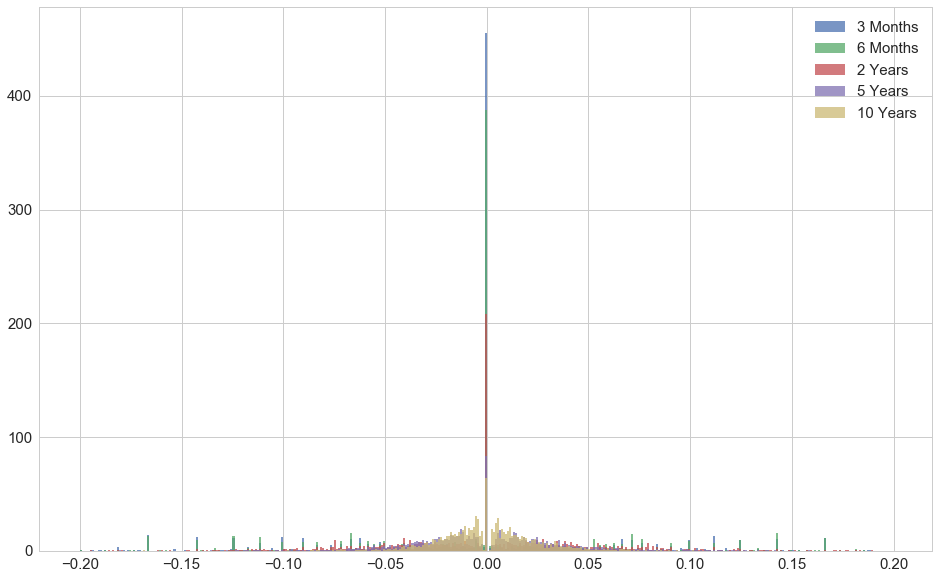

In [40]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.figure(figsize=(16,10))
limit = 0.2
df_change_std = df_change/df_change.std()
bins = np.arange(-limit, limit, 0.001)
for (tenor, label) in tenor_label_pairs:
    # filtered_df = df_change[((df_change[tenor] > -limit) & ((df_change[tenor] < limit)))][tenor]
    plt.hist(df_change[((df_change[tenor] > -limit) & ((df_change[tenor] < limit)))][tenor],
             bins=bins, alpha=0.75, label=label, normed=True)

plt.legend(loc='best')
plt.show()

***
## Question 3 ##

Given the following

\begin{align}
B = \sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N}
\end{align}


Using summation of geometric progression (assuming $Y \cancel{=} 0$):
\begin{aligned}
B = \frac{C\Delta T} {(1 + Y \Delta T )}\bigg(\frac {1 - (\frac {1} {1 + Y \Delta T})^N} {1 - (\frac {1} {1 + Y \Delta T})}\bigg)  + \frac{1} {(1 + Y \Delta T )^N}
\end{aligned}

\begin{align}
\require{cancel}
= \frac{C\Delta T \cancel{(1 + Y \Delta T)} } {\cancel{(1 + Y \Delta T )}}\bigg(\frac {1 - (\frac {1} {1 + Y \Delta T})^N} {(1 + Y \Delta T) - 1}\bigg)  + \frac{1} {(1 + Y \Delta T )^N}
\end{align}

\begin{align}
= \frac{C\cancel{\Delta T} } {Y \cancel{\Delta T}}\bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg)  + \frac{1} {(1 + Y \Delta T )^N}
\end{align}


\begin{align}
\\
\implies
\boxed{
B = 
 \frac{C} {Y}\bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg)  + \frac{1} {(1 + Y \Delta T )^N} } \tag{1}
\end{align}



  
  
Now, we have to prove that a par bond ($B = 1$) has yield ($Y$) the same as coupon ($C$).  
That is,
\begin{align}
B = 1\ \ \text{iff}\ \ C = Y
\end{align}

We first prove the reverse implication.  
If $C = Y$  :

\begin{align}
B = 
 \frac{\cancel{C}} {\cancel{Y}}\bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg)  + \frac{1} {(1 + Y \Delta T )^N} \\
 = \bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg)  + \frac{1} {(1 + Y \Delta T )^N}  = 1
\end{align}

\begin{align}
\implies \boxed {B = 1}
\end{align}

Next, the forward implication.  
if $B = 1 $  :
\begin{align}
\implies
1 = \frac{C} {Y}\bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg)  + \frac{1} {(1 + Y \Delta T )^N}
\end{align} 
Taking all terms in the LHS to the RHS
\begin{align}
\implies
\bigg( 1 - \frac{1} {(1 + Y \Delta T)^N}\bigg) - \frac {C} {Y} \bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg) = 0
\\
\implies \bigg( 1 - \frac {C} {Y} \bigg) \bigg( 1 - \frac{1} {(1 + Y \Delta T)^N}\bigg) = 0 
\end{align}

So, either $ \bigg( 1 - \frac {C} {Y} \bigg) = 0$ or $ \bigg( 1 - \frac{1} {(1 + Y \Delta T)^N}\bigg) = 0 $
  
if $ \bigg( 1 - \frac {C} {Y} \bigg) = 0 \ \ \ \implies \boxed{Y = C} $

if $ \bigg( 1 - \frac{1} {(1 + Y \Delta T)^N}\bigg) = 0 \ \ \ \implies \frac{1} {(1 + Y \Delta T)^N} = 1 \\
\implies Y = 0 $

However, while deriving equation $(1)$, we assumed that $Y \cancel{=} 0$, so we have to take that case differently.
  
if $ Y = 0 $, 
\begin{align}
\implies 1 = \sum_{n=1}^{N} \frac{C\Delta T} {(1 + \cancelto{0}{Y \Delta T} )^n}
+ \frac{1} {(1 + \cancelto{0}{Y \Delta T} )^N}
\\
\implies 1 = C \Delta T \sum_{n=1}^{N} 1 + 1
\\
\implies C \Delta T \ N = 0 \\ \implies C = 0
\end{align}
Or
\begin{align}
\boxed{C = Y}
\end{align}

Now, from equation $(1)$ we have the following result:

\begin{align}
B = 
 \frac{C} {Y}\bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg)  + \frac{1} {(1 + Y \Delta T )^N}
\end{align}

Taking partial derivative w.r.t $Y$ on both sides:
\begin{align}
\frac {\partial B} {\partial Y} = \frac {\partial } {\partial Y}\bigg[ \bigg(\frac {C} {Y} \bigg) \bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg) \bigg] + \frac {\partial } {\partial Y} \bigg( \frac{1} {(1 + Y \Delta T )^N} \bigg)
\\
= \bigg( \frac {\partial } {\partial Y}\bigg(\frac {C} {Y} \bigg) \bigg) \bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg) + \bigg( \frac {C} {Y}\bigg) \frac {\partial } {\partial Y} \bigg({1 - \frac {1} {(1 + Y \Delta T)^N}}\bigg) +  \frac {(-N \Delta T)} {(1 + Y \Delta T )^{N+1}}
\\
= \frac{-C} {Y^2} \bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg) + \bigg( \frac {C} {Y}\bigg)\bigg(\frac {N \Delta T} {(1 + Y \Delta T)^{N+1}} \bigg) -  \frac {N \Delta T} {(1 + Y \Delta T )^{N+1}}
\\
\\
\implies \boxed{ \frac {\partial B} {\partial Y} = \frac{-C} {Y^2} \bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg) + \bigg( \frac {C} {Y} - 1 \bigg)\bigg(\frac {N \Delta T} {(1 + Y \Delta T)^{N+1}} \bigg)} \tag{2}
\end{align}

Now, from the initial relation regarding $B$, we have:
\begin{align}
B = \sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N}
\end{align}

Taking natural log on both sides:
\begin{align}
\ln {B} = \ln \bigg( \sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N} \bigg)
\end{align}

Taking partial derivative w.r.t. $Y$:
\begin{align}
\frac {1} {B} \frac{\partial B} {\partial Y} = \frac {\frac {\partial} {\partial Y} \bigg( \sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N} \bigg)}
{\bigg( \sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N} \bigg)}
\\
= \frac {\sum_{n=1}^{N} \frac{C\Delta T (-n \Delta T)} {(1 + Y \Delta T )^{n+1}}  + \frac{(-N \Delta T)} {(1 + Y \Delta T )^{N+1}}}
{\bigg( \sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N} \bigg)}
\\
= \frac {-1} {(1 + Y \Delta T)}\Bigg[ \frac {\sum_{n=1}^{N} \frac{C\Delta T } {(1 + Y \Delta T )^{n+1}}(n \Delta T)  + \frac{1} {(1 + Y \Delta T )^{N+1}} (N \Delta T)}
{\sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N}} \Bigg]
\\
\\
\implies \boxed{
\frac {1} {B} \frac{\partial B} {\partial Y} = \frac {-1} {(1 + Y \Delta T)}\Bigg[ \frac {\sum_{n=1}^{N} \frac{C\Delta T } {(1 + Y \Delta T )^{n+1}}(n \Delta T)  + \frac{1} {(1 + Y \Delta T )^{N+1}} (N \Delta T)}
{\sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N}} \Bigg]} \tag{3}
\end{align}

Now, from equation $(1)$ we have the following relation:

\begin{align}
B = \frac{C} {Y}\bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg)  + \frac{1} {(1 + Y \Delta T )^N}
\\
= \frac{C [(1 + Y \Delta T)^N  - 1]} {Y (1 + Y \Delta T)^N} + \frac{1} {(1 + Y \Delta T )^N}
\\
= \frac{C [(1 + Y \Delta T)^N  - 1] + Y} {Y (1 + Y \Delta T)^N}
\end{align}

Taking natural log on both sides:
\begin{align}
\ln B = \ln \ [C (1 + Y \Delta T)^N + (Y - C)] - \ln Y - N \ln \ (1 + Y \Delta T)
\end{align}

Partial derivative w.r.t. $Y$:
\begin{align}
\frac {1} {B} \frac{\partial B} {\partial Y} = \frac { \frac {\partial} {\partial Y} [C (1 + Y \Delta T)^N + (Y - C)]}  {C (1 + Y \Delta T)^N + (Y - C)} - \frac {1} {Y} - \frac {N \Delta T} {(1 + Y \Delta T)}
\\
= \frac { [C \ N \ \Delta T(1 + Y \Delta T)^{N-1} + 1]}  {C (1 + Y \Delta T)^N + (Y - C)} - \bigg( \frac {1} {Y} + \frac {N \Delta T} {(1 + Y \Delta T)} \bigg)
\\
= \frac { [N \ \Delta T(1 + Y \Delta T)^{N-1} + \frac{1}{C}]}  {(1 + Y \Delta T)^N + (\frac{Y}{C} - 1)} - \bigg( \frac {1} {Y} + \frac {N \Delta T} {(1 + Y \Delta T)} \bigg)
\\
\implies \frac {\partial B} {B}
= \frac {\partial Y} {Y} \ Y \bigg[\frac { N \ \Delta T(1 + Y \Delta T)^{N-1} + \frac{1}{C}}  {(1 + Y \Delta T)^N + (\frac{Y}{C} - 1)} - \bigg( \frac {1} {Y} + \frac {N \Delta T} {(1 + Y \Delta T)} \bigg) \bigg]
\end{align}
  
This gives us the following relation:
\begin{align}
\implies \boxed {\frac {\partial B} {B}
= \frac {\partial Y} {Y} \ \bigg[\frac { N \ Y \Delta T(1 + Y \Delta T)^{N-1} + \frac{Y}{C}}  {(1 + Y \Delta T)^N + (\frac{Y}{C} - 1)} - \bigg( 1 + \frac {N \ Y \Delta T} {(1 + Y \Delta T)} \bigg) \bigg]} \tag{4}
\end{align}
  
or:
  
\begin{align}
\implies \boxed {\frac {\Delta B} {B}
= \frac {\Delta Y} {Y} \ \bigg[\frac { N \ Y \Delta T(1 + Y \Delta T)^{N-1} + \frac{Y}{C}}  {(1 + Y \Delta T)^N + (\frac{Y}{C} - 1)} - \bigg( 1 + \frac {N \ Y \Delta T} {(1 + Y \Delta T)} \bigg) \bigg]} \tag{5}
\end{align}

This gives us the following relation between price-volatility ($\sigma_B$) and yield-volatility ($\sigma_Y$) for general bonds:
\begin{align}
\\
\implies \boxed {\sigma_B
= \sigma_Y \ \left| \frac { N \ Y \Delta T(1 + Y \Delta T)^{N-1} + \frac{Y}{C}}  {(1 + Y \Delta T)^N + (\frac{Y}{C} - 1)} - \bigg( 1 + \frac {N \ Y \Delta T} {(1 + Y \Delta T)} \bigg) \right|} \tag{6}
\end{align}

[absolute value since the standard deviation is always positive]

For par bonds ($B=1$), we found that $Y=C$, so we get the following relation:
\begin{align}
\sigma_B
= \sigma_Y \ \left|\frac { N \ Y \Delta T(1 + Y \Delta T)^{N-1} + \cancelto{1}{\frac{Y}{C}}}  {(1 + Y \Delta T)^N + (\cancelto{0}{\frac{Y}{C} - 1)}} - \bigg( 1 + \frac {N \ Y \Delta T} {(1 + Y \Delta T)} \bigg) \right|
\\
= \sigma_Y \ \left|\frac { N \ Y \Delta T(1 + Y \Delta T)^{N-1} + 1}  {(1 + Y \Delta T)^N } - \bigg( 1 + \frac {N \ Y \Delta T} {(1 + Y \Delta T)} \bigg) \right|
\\
= \sigma_Y \ \left|\frac { N \ Y \Delta T} {(1 + Y \Delta T)} + \frac {1}  {(1 + Y \Delta T)^N } - \bigg( 1 + \frac {N \ Y \Delta T} {(1 + Y \Delta T)} \bigg) \right|
\\
= \sigma_Y \ \left|\frac {1}  {(1 + Y \Delta T)^N } - 1  \right|
\end{align}

Assuming $Y > 0 $ for par bonds, we get:

\begin{align}
\\
\implies \boxed {\sigma_B
= \sigma_Y \ \bigg(1 - \frac {1}  {(1 + Y \Delta T)^N } \bigg)} \tag{7}
\end{align}

